In [ ]:
import torch
from transformers import BertForQuestionAnswering, BertTokenizer, BertForSequenceClassification, BertForPreTraining


In [ ]:
#download the model
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad', return_dict=False)

In [ ]:
#tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [121]:
for ind in df3.index:
    
    text = df3['summary'][ind]
    question = "Which gene is knocked?"
    question = '[CLS]' + question + '[SEP]'
    paragraph = text + '[SEP]'
    question_tokens = tokenizer.tokenize(question)
    paragraph_tokens = tokenizer.tokenize(paragraph)
    tokens = question_tokens + paragraph_tokens 
    input_ids = tokenizer.convert_tokens_to_ids(tokens)
    segment_ids = [0] * len(question_tokens)
    segment_ids += [1] * len(paragraph_tokens)
    input_ids = torch.tensor([input_ids])
    segment_ids = torch.tensor([segment_ids])
    start_scores, end_scores = model(input_ids, token_type_ids = segment_ids)
    start_index = torch.argmax(start_scores)
    end_index = torch.argmax(end_scores)
    answer = ' '.join(tokens[start_index:end_index+1])
  
    answer = tokens[start_index]


    for i in range(start_index + 1, end_index + 1):
    
   
        if tokens[i][0:2] == '##':
            answer += tokens[i][2:]
    
    
        else:
            answer += ' ' + tokens[i]

    print('Answer: "' + answer + '"')
    result.append(answer)
        

Answer: "rph1"
Answer: "met"
Answer: "which gene is knocked ? [SEP] this superseries is composed of the subseries listed below ."
Answer: "snail"
Answer: "activity"
Answer: "fgfr1"
Answer: "sox4"
Answer: "pit"
Answer: "which gene is knocked ? [SEP] this superseries is composed of the subseries listed below ."
Answer: "otx2"
Answer: "ift74"
Answer: "eralpha"
Answer: "polr3g"
Answer: "cyclin y"
Answer: "adenovirus 5"
Answer: "[CLS]"
Answer: "lnc _ asnr"
Answer: "astrocytic drd2"
Answer: "which gene is knocked ? [SEP] this superseries is composed of the subseries listed below ."
Answer: "[CLS] which gene is knocked ? [SEP] a family of apses transcription factor is known to be fungal - specific transcriptional regulators and play important roles in governing growth , differentiation , and virulence of diverse fungal pathogens . yet none of apses - like transcription factors have been identified and investigated in a basidiomycetous fungal pathogen , cryptococcus neoformans . in the present

RuntimeError: The size of tensor a (633) must match the size of tensor b (512) at non-singleton dimension 1

ind is the index of the row to traverse

# Count number of words to badage tokenizer's issue

It does not allow us to use more than 512 words. However, there should be a way to do it and it has non-trivial solution

In [3892]:
df = pd.read_csv('Rand400SeriesBERT.csv', encoding= 'unicode_escape')
df.head(3)

,id,uid,accession,title,summary,All Genes,Manipulated Genes,BERT
0,1063.0,200165074.0,GSE165074,RNA-Seq analyses of isoalted primary cardiac f...,Purpose: The biological and biochemical functi...,"FAM114A1, P60",Fam114a1 knockout,fam114a1 - / -
1,16972.0,200036665.0,GSE36665,Gene expression profiling of Wwox targeted abl...,The WWOX gene has been implicated in human can...,WWOX,WWOX knockout,wwox
2,16289.0,200042447.0,GSE42447,Activation of the chromatin-remodeling factor ...,We investigate the role of Brg1 and Olig2 duri...,"Brg1, Olig2, RPolII, Smarca4, Olig2",NaN,ol


In [3905]:
df['totalwords'] = df['summary'].str.split().str.len()
df.count()

id                   401
uid                  401
accession            401
title                401
summary              400
All Genes            402
Manipulated Genes    256
BERT                 309
totalwords           400
dtype: int64

In [3904]:
df.query('totalwords <= 512')

,id,uid,accession,title,summary,All Genes,Manipulated Genes,BERT,totalwords
0,1063.0,200165074.0,GSE165074,RNA-Seq analyses of isoalted primary cardiac f...,Purpose: The biological and biochemical functi...,"FAM114A1, P60",Fam114a1 knockout,fam114a1 - / -,243.0
1,16972.0,200036665.0,GSE36665,Gene expression profiling of Wwox targeted abl...,The WWOX gene has been implicated in human can...,WWOX,WWOX knockout,wwox,140.0
2,16289.0,200042447.0,GSE42447,Activation of the chromatin-remodeling factor ...,We investigate the role of Brg1 and Olig2 duri...,"Brg1, Olig2, RPolII, Smarca4, Olig2",NaN,ol,136.0
3,18364.0,200016344.0,GSE16344,Expression in Aneuploid Drosophila S2 Cells,Chromosomal and segmental aneuploidies are usu...,No Genes,NaN,histone 4 at lysine 16,111.0
4,967.0,200171784.0,GSE171784,Influence of the aminoglycoside antibiotic apr...,Bacterial populations face the constant threat...,No Genes,NaN,apr,115.0
...,...,...,...,...,...,...,...,...,...
396,7762.0,200102417.0,GSE102417,A comparative miRNA/mRNA analysis in distinct ...,BACKGROUND & AIMS: We performed an integrated ...,"lymphotoxin alpha, lymphotoxin beta, Myc, Tet-...",NaN,NaN,375.0
397,3796.0,200135362.0,GSE135362,Compared gene expression profile of Lgr5-expre...,The Lgr5 receptor is a marker of intestinal st...,"Lgr5, Wnt, Rspondin 2","Lgr5 knockin, Lgr5 knockout",lgr5 - egfp - ires - cre,159.0
398,16783.0,200031920.0,GSE31920,Small RNA profiling of wildtype and Eri1-defic...,Natural killer (NK) cells play a critical role...,"Eri1, Ly49, Ly49D, Ly49H",Eri1 deficiency,NaN,165.0
399,8225.0,200094430.0,GSE94430,Capturing the onset of PRC2-mediated repressiv...,Our study defines nucleation and spreading reg...,"JARID2, MTF2, PRC2",NaN,"polycomb repressive complex 2 ( prc2 ) , demon...",49.0


It is clear that number of words is not a main issue of why there are over 512 tokenisers

In [3935]:
df.count()

id                   401
uid                  401
accession            401
title                401
summary              400
All Genes            402
Manipulated Genes    256
BERT                 309
totalwords           400
dtype: int64

# Compare BERT to Manual to Supervised Extraction

In [68]:
import pandas as pd

In [10]:
df = pd.read_csv('Rand400SeriesBERT.csv', encoding= 'unicode_escape')
df.head(3)

,id,uid,accession,title,summary,All Genes,Manipulated Genes,BERT
0,1063.0,200165074.0,GSE165074,RNA-Seq analyses of isoalted primary cardiac f...,Purpose: The biological and biochemical functi...,"FAM114A1, P60",Fam114a1 knockout,fam114a1 - / -
1,16972.0,200036665.0,GSE36665,Gene expression profiling of Wwox targeted abl...,The WWOX gene has been implicated in human can...,WWOX,WWOX knockout,wwox
2,16289.0,200042447.0,GSE42447,Activation of the chromatin-remodeling factor ...,We investigate the role of Brg1 and Olig2 duri...,"Brg1, Olig2, RPolII, Smarca4, Olig2",NaN,ol


<AxesSubplot:>

D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


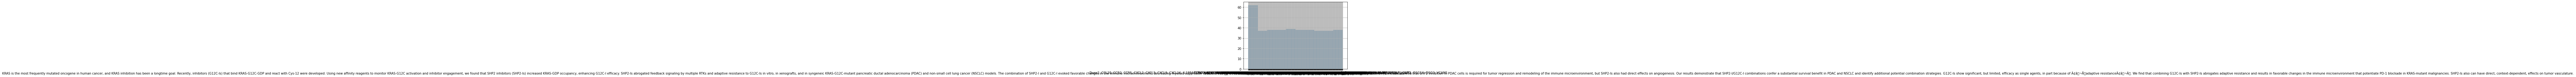

In [4]:
df['All Genes'].hist()

In [12]:
df['All Genes'] = df['All Genes'].apply(lambda row: str(row))

In [21]:
s = ' '.join(df['All Genes'])
s = s.replace(",","")
s.lower()

'fam114a1 p60 wwox brg1 olig2 rpolii smarca4 olig2  no genes no genes thpo mpl tie2 esam1 epcr gli1 smarca2 hhip sps2 snord115 htr2c oct4 sox2 klf4 myc oskm ccne1 no genes tnaa runx2 nr4a th1 th2 cdk4/6 rad51 nhej no genes arid1a pi3k sfn keap1 nrf2 akr1b10 akr1c1 akr1c2 akr1c3 nqo1 aldh3a1 dicer ago ago2 nf-kappab aquaporin-1 idh1 idh2 merlin nf2 no genes srfbp1 pdxk hp1g cbx3 hp1g daxx dnmt1 papd1 papd4 papd5 zcchc6 zcchc11 tut1 piwi kat6 enok prdm16 e2 dab2 mll1 taspase1 ckii wtx p53 e1b 55k cbp p300 akap8 clstn1 tcf4 prkd3 mcam susd5 tgfbeta hoxc-as3 ybx1 ar zfx brd4 adam12 lnc015192 mir-34a hupf1 fxr1 sec1l1 ncor1 bat3 phd14 znf294 c190orf5 sdcbp syndecan-binding protein-1 syntenin-1 nod scid il2r son braf nras mapk tgfbeta tgfb wnt p53 nos2 ci-hox10 hox10 ccnd1 nfib memo1 erbb2 nrip1 rip140 cbx7 e-cadherin dok4 nmt2 egr1 egfr pparã\x8eâ³ srebf1 chrebp hnf4ã\x8eâ± fasn scd1 plin2 met ccm3 klf2 klf4 cd44v hoxc8 pkc-ã\x8eâ²ii nf-ã\x8eâºb atg7 sting ifng hoxb7 bt-474 mda-mb-361 mcf7 

In [22]:
words = s.split(" ")

In [23]:
print("Duplicate words in a given string : ");  
for i in range(0, len(words)):  
    count = 1;  
    for j in range(i+1, len(words)):  
        if(words[i] == (words[j])):  
            count = count + 1;  
            #Set words[j] to 0 to avoid printing visited word  
            words[j] = "0";  
              
    #Displays the duplicate word if count is greater than 1  
    if(count > 1 and words[i] != "0"):  
        print(words[i]);  

Duplicate words in a given string : 
Brg1
Olig2
Smarca4

No
Genes
KLF4
MYC
Nr4a
Th2
CDK4/6
ARID1A
PI3K
Nrf2
Dicer
Ago2
NF-kappaB
IDH1
HP1g
CBX3
p53
CBP
p300
TCF4
TGFbeta
AR
BRD4
BRAF
MAPK
Wnt
EGFR
SREBF1
MET
NF-ÃÂºB
mTOR
IAP
STAT
Lamin
EHMT2
HDAC
CDK6
IL1B
Kras
ADAR2
ERK
p38
ARID1B
LINE-1
LDHA
Snail
II
STAT3
BET
H3K9ac
OGT
CD4
IL-2
IFN-ÃÂ³
IL-17
mTORC1
Myc
and
PTEN
NF-kB
Pol
ETS1
KRAS
is
the
in
cancer
inhibition
a
inhibitors
that
with
to
SHP2
G12C-I
SHP2-Is
adaptive
resistance
G12C-Is
combination
of
favorable
changes
immune
microenvironment
cells
PD-1
PDAC
tumor
but
also
direct
effects
on
results
AHR
TTF-1
Brd4
PKA
HNF4alpha
TGF-ÃÂ²
c-Myc
m6A
Akt
Eri1
Ly49
Ly49D
Ly49H
REST
Trp53
ATRX
PKM2
IRF4
1
NRC-1
Smad7
tumors)
Sox2
recA
arlRS
EZH2
STAT1
lymphotoxin


The following words are stoping words and do not bring any biological meaning in this context [ No, Genes, II, and, is, the, in, a, that, with, to, adaptive, resistance, combination, of, favorable, changes, immune, but, also, direct, effects, on, results, 1 ]

In [66]:
res = s.count(" ")+1
res

1381

In [70]:
super_s = pd.read_csv('Annotated.csv')
super_s.head(3)

,id,uid,accession,title,summary,All Genes,Manipulated Genes,Interactions,list,GeneAnnotation
0,1063.0,200165074.0,GSE165074,RNA-Seq analyses of isoalted primary cardiac f...,Purpose: The biological and biochemical functi...,"FAM114A1, P60",Fam114a1 knockout,NaN,"['Purpose:', 'The', 'biological', 'and', 'bioc...","['FAM114A1', 'FAM114A1', 'P60', 'ADAMTS15', 'F..."
1,16972.0,200036665.0,GSE36665,Gene expression profiling of Wwox targeted abl...,The WWOX gene has been implicated in human can...,WWOX,WWOX knockout,NaN,"['The', 'WWOX', 'gene', 'has', 'been', 'implic...","['WWOX', 'WWOX', 'WWOX', 'WWOX', 'KO', 'WWOX',..."
2,16289.0,200042447.0,GSE42447,Activation of the chromatin-remodeling factor ...,We investigate the role of Brg1 and Olig2 duri...,"Brg1, Olig2, RPolII, Smarca4, Olig2",NaN,RPolII regulates Brg1,"['We', 'investigate', 'the', 'role', 'of', 'Br...",['II']


In [26]:
counts = {}
for word in words:
    if word not in counts:
        counts[word] = 0
    counts[word] += 1

In [28]:
import collections

word_counts = collections.Counter(words)
for word, count in sorted(word_counts.items()):
    print('"%s" is repeated %d time%s.' % (word, count, "s" if count > 1 else ""))

"" is repeated 1 time.
"(FER)" is repeated 1 time.
"(G12C-Is)" is repeated 1 time.
"(LHP" is repeated 1 time.
"(NSCLC)" is repeated 1 time.
"(PDAC)" is repeated 1 time.
"(S7HP" is repeated 1 time.
"(S7HP+Snail)" is repeated 1 time.
"(SHP2-Is)" is repeated 1 time.
"(bHLH)-PAS" is repeated 1 time.
"0" is repeated 279 times.
"1" is repeated 1 time.
"2" is repeated 1 time.
"2-AG" is repeated 1 time.
"22G-RNA" is repeated 1 time.
"2ÃÂ³" is repeated 1 time.
"4C" is repeated 1 time.
"55" is repeated 1 time.
"55K" is repeated 1 time.
"5C" is repeated 1 time.
"???" is repeated 1 time.
"A53T" is repeated 1 time.
"ABCF1" is repeated 1 time.
"ABHD12" is repeated 1 time.
"AC007278.2" is repeated 1 time.
"ACACA" is repeated 1 time.
"ACE2" is repeated 1 time.
"ACT-333679" is repeated 1 time.
"ADAR" is repeated 1 time.
"ADAR1" is repeated 1 time.
"ADAR2" is repeated 1 time.
"AF9" is repeated 1 time.
"AHR" is repeated 1 time.
"AKAP8" is repeated 1 time.
"AKR1B10" is repeated 1 time.
"AKR1C1" is repeat